# Assignment

**1.**

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

data = pd.read_csv('DepressionPrevalence.csv')

print("Depression Rates")
print(data)

numeric_data = data.drop(['Country', 'Year', 'Status'], axis=1)

imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_imputed)

pca = PCA(n_components=2)
numeric_data_pca = pca.fit_transform(numeric_data_scaled)

n_clusters = 2  
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = spectral.fit_predict(numeric_data_scaled)

data['Cluster'] = labels

print("Clustered Data:")
print(data[['Country', 'Year', 'Cluster']])

plt.scatter(numeric_data_pca[:, 0], numeric_data_pca[:, 1], c=labels, s=50, cmap='cividis')
plt.title('Spectral Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Depression Rates
              Entity      Code  Year  \
0           Abkhazia  OWID_ABK  2015   
1        Afghanistan       AFG  1990   
2        Afghanistan       AFG  1991   
3        Afghanistan       AFG  1992   
4        Afghanistan       AFG  1993   
...              ...       ...   ...   
56390       Zimbabwe       ZWE  1988   
56391       Zimbabwe       ZWE  1989   
56392       Zimbabwe       ZWE  2020   
56393       Zimbabwe       ZWE  2021   
56394  Åland Islands       ALA  2015   

       Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)  \
0                                                    NaN                                 
1                                               4.291054                                 
2                                               4.293268                                 
3                                               4.298265                                 
4                                               4.30

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Asia'

**2.**

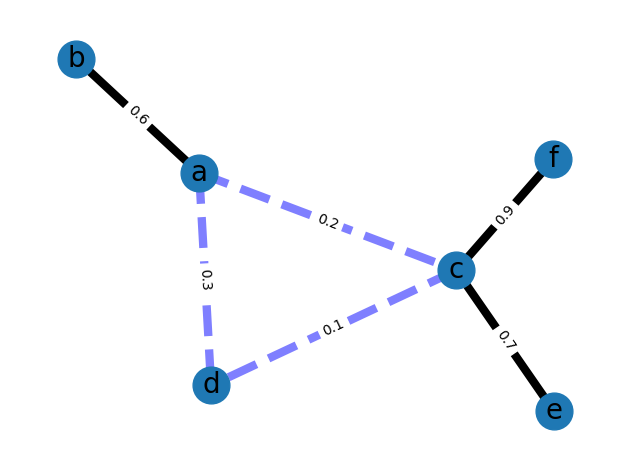

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)

nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
for node, centrality in eigenvector_centrality.items():
    print(f"{node}: {centrality}")

a: 0.5180745272221078
b: 0.21182323654035046
c: 0.5986753092298448
d: 0.45660141993768566
e: 0.2447781833973353
f: 0.24477818339733545


**3.**

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

Subreddit: splatoon
Title: Splatoon
Centrality Nodes based on corresponding Eigenvectors: [Redditor(name='hoopderscotch'), Redditor(name='PewdiepieSucks'), Redditor(name='PKMNTrainerMark'), Redditor(name='kitlemonfoot'), Redditor(name='animemecha')]


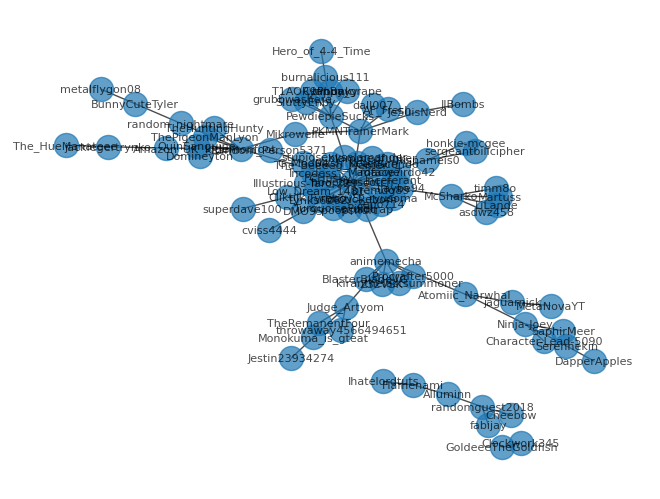

In [4]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

reddit = praw.Reddit(
    client_id = "C7BN1ByX3VgOzwwQhS6OSA",
    client_secret = "PwnZYvDn1lM9qdiZGyObFW3vbyo8dw",
    user_agent = "Sealiosaurus",
)

def print_subreddit_info(subreddit):
    print(f"Subreddit: {subreddit.display_name}")
    print(f"Title: {subreddit.title}")

def get_top_post_id(subreddit):
    return subreddit.top(limit=1).__next__().id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        if isinstance(comment, praw.models.MoreComments):
            continue
        if comment.author and comment.parent() and comment.parent().author:
            G.add_edge(comment.author, comment.parent().author)

    return G

def perform_social_network_analysis(social_network):
    eigenvector_centrality = nx.eigenvector_centrality(social_network)
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
    top_nodes = sorted_nodes[:5]
    print("Centrality Nodes based on corresponding Eigenvectors:", top_nodes)

def visualize_network(social_network):
    pos = nx.spring_layout(social_network)
    nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

subreddit_name = "splatoon"
subreddit = reddit.subreddit(subreddit_name)

print_subreddit_info(subreddit)
post_id = get_top_post_id(subreddit)
social_network = create_social_network(post_id)
perform_social_network_analysis(social_network)
visualize_network(social_network)